# Getting Started

In this notebook we will clean and study some aspects of the NHFS Survey data (2019-21).

Importing the necessary libraries


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


In [6]:
# @title
# Inject JavaScript to enable Hinterland (real-time code completion)
from IPython.display import display, Javascript

display(Javascript('''
require(["notebook/js/codecell"], function(codecell) {
  codecell.CodeCell.options_default.cm_config.extraKeys = {
    "Tab": "autocomplete"
  };
  console.log("Hinterland enabled.");
});
'''))

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv("C:\\Users\\mehul\\MyLab\\NHFS Research\\Data\\NFHS_5_India_Districts_Factsheet_Data.csv")

# Data Preprocessing
### Renaming some columns

In [8]:
df.rename(columns={'Female population age 6 years and above who ever attended school (%)': 'Female_school ever %', ' Sex ratio of the total population (females per 1,000 males)':'current sex-ratio', 'Sex ratio at birth for children born in the last five years (females per 1,000 males)':'sex-ratio at birth',
                    'Population living in households with electricity (%)': 'population % electricity','Population living in households with an improved drinking-water source1 (%)': 'drinking water %',
                    'Population living in households that use an improved sanitation facility2 (%)':'sanitation %','Households using clean fuel for cooking3 (%)':'clean fuel %','Households using iodized salt (%)':'iodized salt %','Households with any usual member covered under a health insurance/financing scheme (%)':'Health insurance/finance scheme %','Women (age 15-49) who are literate4 (%)':'Women literacy %','Women age 20-24 years married before age 18 years (%)':'women child marriage %','Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)': 'Women menstural hygiene','Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any method6 (%)':'Family planning methods %','All women age 15-49 years who are anaemic22 (%)':'Anaemic women %','Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)':'Women high blood sugar %','Men age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level  or taking medicine to control blood sugar level23 (%)': 'Men high blood sugar %',
                    ' Women age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%)':'Women High BP % ','Men age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%)':'Men high BP %',' Men age 15 years and above who use any kind of tobacco (%)': 'Men Tobacco %','Women age 15 years and above who consume alcohol (%)' : 'Women Alcohol %','Men age 15 years and above who consume alcohol (%)':'Men Alcohol %'}, inplace=True)

# List of columns:

In [9]:
print(df.shape)
df.head()


(707, 109)


,District Names,State/UT,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female_school ever %,Population below age 15 years (%),current sex-ratio,sex-ratio at birth,Children under age 5 years whose birth was registered with the civil authority (%),...,Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ?160 mm of Hg and/or Diastolic ?100 mm of Hg) (%),Men high BP %,Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women Alcohol %,Men Alcohol %
0,Nicobars,Andaman & Nicobar Islands,882,764,125,78.0,23.0,973,927,98.0,...,32.9,11.1,47.0,13.4,13.2,5.4,63.5,76.8,29.6,64.5
1,North & Middle Andaman,Andaman & Nicobar Islands,874,789,108,82.7,19.8,950,844,100.0,...,22.6,6.0,32.2,1.7,0.3,15.8,46.8,70.5,5.1,45.3
2,South Andaman,Andaman & Nicobar Islands,868,844,134,84.7,21.0,967,935,96.5,...,17.9,6.1,26.9,1.3,0.7,8.0,19.6,50.8,1.7,32.8
3,Srikakulam,Andhra Pradesh,874,780,100,60.0,20.7,1140,1163,95.0,...,14.4,5.5,22.9,1.0,0.2,3.8,7.1,21.3,0.6,28.3
4,Vizianagaram,Andhra Pradesh,902,853,134,56.0,20.6,1114,898,95.4,...,14.8,6.4,25.1,4.9,0.6,7.3,11.4,21.5,0.8,32.3


In [10]:
column_list = list(df.columns)
column_list

['District Names',
 'State/UT',
 'Number of Households surveyed',
 'Number of Women age 15-49 years interviewed',
 'Number of Men age 15-54 years interviewed',
 'Female_school ever %',
 'Population below age 15 years (%)',
 'current sex-ratio',
 'sex-ratio at birth',
 'Children under age 5 years whose birth was registered with the civil authority (%)',
 'Deaths in the last 3 years registered with the civil authority (%)',
 'population % electricity',
 'drinking water %',
 'sanitation %',
 'clean fuel %',
 'iodized salt %',
 'Health insurance/finance scheme %',
 'Children age 5 years who attended pre-primary school during the school year 2019-20 (%)',
 'Women literacy %',
 'Women (age 15-49)  with 10 or more years of schooling (%)',
 'women child marriage %',
 'Births in the 5 years preceding the survey that are third or higher order (%)',
 'Women age 15-19 years who were already mothers or pregnant at the time of the survey (%)',
 'Women menstural hygiene',
 'Family planning methods %'

# Causal Study:

We will study the effects of Health and education in young women and mothers on the health and well being of children below 5 years of age.

Features type :

1. Education level in Women and girls
2. Living conditions related to work and hygiene in Women and Girls
3. Co morbidities and health status of women

Target (dependent variables):

1.'Total children age 6-23 months receiving an adequate diet16, 17  (%)',
2. 'Children under 5 years who are stunted (height-for-age)18 (%)',
3. 'Children under 5 years who are wasted (weight-for-height)18 (%)',
4. 'Children under 5 years who are severely wasted (weight-for-height)19 (%)',
5. 'Children under 5 years who are underweight (weight-for-age)18 (%)',
6. 'Children under 5 years who are overweight (weight-for-height)20 (%)'
7. 'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)'
8. 'Children Prevalence of symptoms of acute respiratory infection (ARI) in the two weeks preceding the survey (Children under age 5 years) (%) '
9. 'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%) '


## Defining two separate data frames :

## 1. Femaledf
## 2. Childdf

In [11]:
femaledf = df[['District Names',
 'State/UT',
'Female_school ever %',
 'population % electricity',
 'drinking water %',
 'sanitation %',
 'clean fuel %',
 'iodized salt %',
 'Health insurance/finance scheme %',
 'Women literacy %',
 'Women (age 15-49)  with 10 or more years of schooling (%)',
 'women child marriage %',
 'Births in the 5 years preceding the survey that are third or higher order (%)',
'Women menstural hygiene',
 'Family planning methods %',
 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any modern method6 (%)',
 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Female sterilization (%)',
 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - IUD/PPIUD (%)',
 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)',
'Total Unmet need for Family Planning (Currently Married Women Age 15-49  years)7 (%)',
 'Unmet need for spacing (Currently Married Women Age 15-49  years)7 (%)',
 'Health worker ever talked to female non-users about family planning (%)',
'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)',
 'Mothers whose last birth was protected against neonatal tetanus (for last birth in the 5 years before the survey)9 (%)',
 'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)',
 'Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)',
 'Registered pregnancies for which the mother received a Mother and Child Protection (MCP) card (for last birth in the 5 years before the survey) (%)',
 'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)',
 'Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)',
 'Children under age 6 months exclusively breastfed16 (%)',
 'Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)',
 'Women (age 15-49 years) who are overweight or obese (BMI ?25.0 kg/m2)21 (%)',
 'Women (age 15-49 years) who have high risk waist-to-hip ratio (?0.85) (%)',
'Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)',
 'Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)',
 'Anaemic women %',
 'All women age 15-19 years who are anaemic22 (%) ',
 'Women  age 15 years and above with high (141-160 mg/dl) Blood sugar level23 (%)',
 'Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%)',
 'Women high blood sugar %',
'Women age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)',
 'Women age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ?160 mm of Hg and/or Diastolic ?100 mm of Hg) (%)',
 'Women age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%)',
'Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%)',
 'Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%)',
 'Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%)',
 'Women age 15 years and above who use any kind of tobacco (%)',
 'Women Alcohol %']]

In [12]:
femaledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 48 columns):
 #   Column                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                          --------------  -----  
 0   District Names                                                                                                                                                                  707 non-null    object 
 1   State/UT                                                                                                                                                                        707 non-null    object 
 2   Female_school ever %                                                  

## Child_df

In [13]:
childdf = df[['Total children age 6-23 months receiving an adequate diet16, 17  (%)',
'Children under 5 years who are stunted (height-for-age)18 (%)',
'Children under 5 years who are wasted (weight-for-height)18 (%)',
'Children under 5 years who are severely wasted (weight-for-height)19 (%)',
'Children under 5 years who are underweight (weight-for-age)18 (%)',
'Children under 5 years who are overweight (weight-for-height)20 (%)',
'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)',
'Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%) ',
'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%) ']]

In [14]:
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)']

0      (18.7)
1       (5.9)
2       23.5 
3       16.1 
4        1.8 
        ...  
702     27.6 
703     21.8 
704     20.9 
705     31.1 
706     34.1 
Name: Total children age 6-23 months receiving an adequate diet16, 17  (%), Length: 707, dtype: object

# Data Cleaning

In [15]:
# Function to clean some numerical columns

def cleaner(data):
  data = data.str.replace("(","",regex = False).str.replace(",","")
  data = data.str.replace(")","",regex = False).str.replace(",","")
  data = data.str.replace("''","",regex = False)
  data =  pd.to_numeric(data, errors = 'coerce')
  data = pd.DataFrame(data)
  return data

Here we have defined a function to clean our numerical data and convert data type to float or int 64

In [16]:
# @title
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)']= (
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'].str.replace("(","",regex = False).str.replace(",",""))

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\3147298071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)']= (


In [17]:
# @title
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)']= (
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'].str.replace(")","",regex = False).str.replace(",",""))

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\294903512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)']= (


In [18]:
# @title
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)']= (
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'].str.replace("''","",regex = False))

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\3234766659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)']= (


In [19]:
# @title
pot = pd.DataFrame(childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'])

In [20]:
# @title

# Strip any leading/trailing spaces and then convert
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'] = (
    childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'].astype(str).str.strip()
)



# Convert to numeric
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'] = (
    pd.to_numeric(childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'], errors = 'coerce')
)

# Check unique values after conversion
cleaned = childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)']




C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\3094849903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'] = (
C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\3094849903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'] = (


In [21]:
# @title
cleaned = pd.DataFrame(cleaned)

In [22]:
# @title
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 1 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Total children age 6-23 months receiving an adequate diet16, 17  (%)  706 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [23]:
# @title
childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'] = cleaned

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\3476270705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Total children age 6-23 months receiving an adequate diet16, 17  (%)'] = cleaned


In [24]:
rot = cleaner(childdf['Children under 5 years who are stunted (height-for-age)18 (%)'])

In [25]:
childdf['Children under 5 years who are stunted (height-for-age)18 (%)'] = rot

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\4121750390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Children under 5 years who are stunted (height-for-age)18 (%)'] = rot


In [26]:
fot = cleaner(childdf['Children under 5 years who are wasted (weight-for-height)18 (%)'])

In [27]:
childdf['Children under 5 years who are wasted (weight-for-height)18 (%)'] = fot

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\526703990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Children under 5 years who are wasted (weight-for-height)18 (%)'] = fot


In [28]:
joy = cleaner(childdf['Children under 5 years who are severely wasted (weight-for-height)19 (%)'])

In [29]:
childdf['Children under 5 years who are severely wasted (weight-for-height)19 (%)'] = joy

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\1449087909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Children under 5 years who are severely wasted (weight-for-height)19 (%)'] = joy


In [30]:
koy = cleaner(childdf['Children under 5 years who are underweight (weight-for-age)18 (%)'])

In [31]:
childdf['Children under 5 years who are severely wasted (weight-for-height)19 (%)'] = koy

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\4046765238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Children under 5 years who are severely wasted (weight-for-height)19 (%)'] = koy


In [32]:
loy  = cleaner(childdf['Children under 5 years who are underweight (weight-for-age)18 (%)'])
childdf['Children under 5 years who are underweight (weight-for-age)18 (%)'] = loy

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\1367053743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Children under 5 years who are underweight (weight-for-age)18 (%)'] = loy


In [33]:
poy = cleaner(childdf['Children under 5 years who are overweight (weight-for-height)20 (%)'])
childdf['Children under 5 years who are overweight (weight-for-height)20 (%)'] = poy

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\742408023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Children under 5 years who are overweight (weight-for-height)20 (%)'] = poy


In [34]:
yoy = cleaner(childdf['Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)'])
childdf['Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)'] = yoy

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\504775871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childdf['Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)'] = yoy


# Cleaned Childdf:

## All the columns are converted to float data type


In [35]:
childdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 9 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                      --------------  -----  
 0   Total children age 6-23 months receiving an adequate diet16, 17  (%)                                                                        706 non-null    float64
 1   Children under 5 years who are stunted (height-for-age)18 (%)                                                                               707 non-null    float64
 2   Children under 5 years who are wasted (weight-for-height)18 (%)                                                                             707 non-null    float64
 3   Children under 5 years who are severely wasted

Hence childdf is completely cleaned


In [36]:
# code for downloading cleaned childcsv file
childdf.to_csv('childdf.csv', index=False)



[C:\BACKUPS](childdf.csv)

# Cleaning Femaledf

In [37]:
femaledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 48 columns):
 #   Column                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                          --------------  -----  
 0   District Names                                                                                                                                                                  707 non-null    object 
 1   State/UT                                                                                                                                                                        707 non-null    object 
 2   Female_school ever %                                                  

In [38]:
femaledf['women child marriage %'] = cleaner(femaledf['women child marriage %']).astype(float)

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\1641553291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femaledf['women child marriage %'] = cleaner(femaledf['women child marriage %']).astype(float)


In [39]:
femaledf['Births in the 5 years preceding the survey that are third or higher order (%)'] = cleaner(femaledf['Births in the 5 years preceding the survey that are third or higher order (%)']).astype(float)

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\3930063032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femaledf['Births in the 5 years preceding the survey that are third or higher order (%)'] = cleaner(femaledf['Births in the 5 years preceding the survey that are third or higher order (%)']).astype(float)


In [40]:
femaledf['All women age 15-19 years who are anaemic22 (%) '] = cleaner(femaledf['All women age 15-19 years who are anaemic22 (%) ']).astype(float)

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\2465337438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femaledf['All women age 15-19 years who are anaemic22 (%) '] = cleaner(femaledf['All women age 15-19 years who are anaemic22 (%) ']).astype(float)


In [41]:
femaledf['Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)'] = cleaner(femaledf['Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)']).astype(float)

C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\1337741509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femaledf['Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)'] = cleaner(femaledf['Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)']).astype(float)


In [42]:
goggins = pd.DataFrame(femaledf.iloc[:,22:29])
goggins.columns

Index(['Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)',
       'Mothers whose last birth was protected against neonatal tetanus (for last birth in the 5 years before the survey)9 (%)',
       'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)',
       'Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)',
       'Registered pregnancies for which the mother received a Mother and Child Protection (MCP) card (for last birth in the 5 years before the survey) (%)',
       'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)',
       'Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before t

In [43]:
femaledf['Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)'] = cleaner(femaledf['Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)']).astype(float)
femaledf['Mothers whose last birth was protected against neonatal tetanus (for last birth in the 5 years before the survey)9 (%)'] = cleaner(femaledf['Mothers whose last birth was protected against neonatal tetanus (for last birth in the 5 years before the survey)9 (%)']).astype(float)
femaledf['Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)'] = cleaner(femaledf['Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)']).astype(float)
femaledf['Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)'] = cleaner(femaledf['Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)']).astype(float)
femaledf['Registered pregnancies for which the mother received a Mother and Child Protection (MCP) card (for last birth in the 5 years before the survey) (%)'] = cleaner(femaledf['Registered pregnancies for which the mother received a Mother and Child Protection (MCP) card (for last birth in the 5 years before the survey) (%)']).astype(float)
femaledf['Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)'] = cleaner(femaledf['Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)']).astype(float)
femaledf['Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)'] = cleaner(femaledf['Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)']).astype(float)


C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\4017434938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femaledf['Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)'] = cleaner(femaledf['Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)']).astype(float)
C:\Users\mehul\AppData\Local\Temp\ipykernel_16944\4017434938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femaledf['Mothers whose last 

In [44]:
femaledf = femaledf.drop(columns = ['Children under age 6 months exclusively breastfed16 (%)'])

# Cleaned Femaledf:

In [45]:
femaledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 47 columns):
 #   Column                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                          --------------  -----  
 0   District Names                                                                                                                                                                  707 non-null    object 
 1   State/UT                                                                                                                                                                        707 non-null    object 
 2   Female_school ever %                                                  

In [46]:
femaledf.to_csv('femaledf.csv', index= False)

[C:\BACKUPS](femaledf.csv)

In [47]:
column_lis = list(femaledf.columns)
column_listt = column_lis[2:]

# NaN values
Let's check for NaN values and remove them if they're present

So we do have some NaN values.
Lets simple Impute them.


In [48]:
# Imputing missing values with their means

imputer = SimpleImputer(strategy='mean')
childdf_imp = pd.DataFrame(imputer.fit_transform(childdf), columns=childdf.columns)

In [49]:
femaledf_imp = pd.DataFrame(imputer.fit_transform(femaledf.iloc[:,2:]), columns= femaledf.iloc[:,2:].columns)

So here we have succesfully cleaned the Femaledf(related to the features of our future model).

In [50]:
X = femaledf_imp
y_anaemic = childdf_imp

# Scaling our data

We will try and apply two Scalers on our data namely:

1. MinMax Scaler : transform data to the range [0,1]
2. Robust Scaler : transform data and make it immune to outliers (But can have negative values).



In [51]:
y_anaemic = pd.DataFrame(y_anaemic)

### MIn MAx scaling


In [52]:
# @title


minmax = MinMaxScaler()
min_max_scaled = minmax.fit_transform(X)
X_minmax= pd.DataFrame(min_max_scaled)


In [53]:
# @title
min_max_scaledy = minmax.fit_transform(y_anaemic)
y_anaemic_minmax  = pd.DataFrame(min_max_scaledy)

In [54]:
# @title
X_minmax.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.605948,0.933544,0.979592,0.768034,0.529605,0.988484,0.015528,0.800327,0.534853,0.197917,...,0.184971,0.321429,0.974227,0.516556,0.800595,0.577586,0.904110,0.341772,0.899291,0.691589
1,0.693309,0.784810,0.867347,0.809052,0.577851,0.998081,0.009317,0.743044,0.367292,0.267361,...,0.329480,0.450000,0.726804,0.218543,0.562500,0.073276,0.020548,1.000000,0.662411,0.119159
2,0.730483,0.987342,0.964286,0.850071,0.913377,0.994242,0.000000,0.787234,0.588472,0.296875,...,0.508671,0.510714,0.432990,0.278146,0.431548,0.056034,0.047945,0.506329,0.276596,0.039720
3,0.271375,0.996835,0.790816,0.599717,0.724781,0.548944,0.770186,0.420622,0.387399,0.440972,...,0.410405,0.475000,0.438144,0.344371,0.404762,0.043103,0.013699,0.240506,0.099291,0.014019
4,0.197026,0.984177,0.882653,0.459689,0.566886,0.712092,0.781573,0.322422,0.321716,0.585069,...,0.364162,0.364286,0.443299,0.390728,0.497024,0.211207,0.041096,0.462025,0.160284,0.018692


In [55]:
# @title
y_anaemic_minmax

,0,1,2,3,4,5,6,7,8
0,0.373253,0.177215,0.257471,0.315217,0.315217,0.071090,0.181303,0.160714,0.145038
1,0.117764,0.291139,0.517241,0.644928,0.644928,0.037915,0.077904,0.625000,0.114504
2,0.469062,0.166667,0.186207,0.184783,0.184783,0.341232,0.262040,0.000000,0.152672
3,0.321357,0.137131,0.344828,0.257246,0.257246,0.213270,0.491501,0.116071,0.302799
4,0.035928,0.489451,0.337931,0.452899,0.452899,0.222749,0.592068,0.125000,0.190840
...,...,...,...,...,...,...,...,...,...
702,0.550898,0.495781,0.383908,0.452899,0.452899,0.331754,0.644476,0.142857,0.114504
703,0.435130,0.377637,0.593103,0.594203,0.594203,0.080569,0.582153,0.125000,0.160305
704,0.417166,0.265823,0.252874,0.423913,0.423913,0.146919,0.603399,0.339286,0.226463
705,0.620758,0.559072,0.482759,0.612319,0.612319,0.146919,0.705382,0.178571,0.223919


### Train Test Split


In [73]:
# @title
# Train Test Split:

X_train,X_test,y_train,y_test = train_test_split(X_minmax,y_anaemic_minmax.iloc[:,6],test_size=0.2,random_state=2) # Taking only child Anaemia into account


In [57]:
# @title
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
t = r2_score(y_test,y_pred)



In [58]:
# @title
# Ridge
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.546900301322536

In [59]:
# @title
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.290290451535436

In [60]:
# @title
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4150549832381022

### Robust Scaling

In [61]:

robust = RobustScaler()
X_robust = robust.fit_transform(X)
y_anaemic_robust  = pd.DataFrame(robust.fit_transform(y_anaemic))

In [74]:
y_anaemic

,"Total children age 6-23 months receiving an adequate diet16, 17 (%)",Children under 5 years who are stunted (height-for-age)18 (%),Children under 5 years who are wasted (weight-for-height)18 (%),Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children under 5 years who are overweight (weight-for-height)20 (%),Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%),Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%),Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%)
0,18.7,21.6,15.7,24.6,24.6,1.5,37.7,1.8,5.7
1,5.9,27.0,27.0,42.8,42.8,0.8,30.4,7.0,4.5
2,23.5,21.1,12.6,17.4,17.4,7.2,43.4,0.0,6.0
3,16.1,19.7,19.5,21.4,21.4,4.5,59.6,1.3,11.9
4,1.8,36.4,19.2,32.2,32.2,4.7,66.7,1.4,7.5
...,...,...,...,...,...,...,...,...,...
702,27.6,36.7,21.2,32.2,32.2,7.0,70.4,1.6,4.5
703,21.8,31.1,30.3,40.0,40.0,1.7,66.0,1.4,6.3
704,20.9,25.8,15.5,30.6,30.6,3.1,67.5,3.8,8.9
705,31.1,39.7,25.5,41.0,41.0,3.1,74.7,2.0,8.8


In [75]:
#Robust Scaled Train-Test Split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_robust,y_anaemic_robust.iloc[:,6],test_size=0.2,random_state=2) # Taking only Child Anaemia as the target

In [63]:
X.columns


Index(['Female_school ever %', 'population % electricity', 'drinking water %',
       'sanitation %', 'clean fuel %', 'iodized salt %',
       'Health insurance/finance scheme %', 'Women literacy %',
       'Women (age 15-49)  with 10 or more years of schooling (%)',
       'women child marriage %',
       'Births in the 5 years preceding the survey that are third or higher order (%)',
       'Women menstural hygiene', 'Family planning methods %',
       'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any modern method6 (%)',
       'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Female sterilization (%)',
       'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - IUD/PPIUD (%)',
       'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)',
       'Total Unmet need for Family Planning (Currently Married Women Age 15-49  years)7 (%)',
      

In [64]:
y_anaemic.columns

Index(['Total children age 6-23 months receiving an adequate diet16, 17  (%)',
       'Children under 5 years who are stunted (height-for-age)18 (%)',
       'Children under 5 years who are wasted (weight-for-height)18 (%)',
       'Children under 5 years who are severely wasted (weight-for-height)19 (%)',
       'Children under 5 years who are underweight (weight-for-age)18 (%)',
       'Children under 5 years who are overweight (weight-for-height)20 (%)',
       'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)',
       'Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%) ',
       'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%) '],
      dtype='object')

In [65]:
X_train.columns = column_listt

In [66]:
X_train.columns

Index(['Female_school ever %', 'population % electricity', 'drinking water %',
       'sanitation %', 'clean fuel %', 'iodized salt %',
       'Health insurance/finance scheme %', 'Women literacy %',
       'Women (age 15-49)  with 10 or more years of schooling (%)',
       'women child marriage %',
       'Births in the 5 years preceding the survey that are third or higher order (%)',
       'Women menstural hygiene', 'Family planning methods %',
       'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any modern method6 (%)',
       'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Female sterilization (%)',
       'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - IUD/PPIUD (%)',
       'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)',
       'Total Unmet need for Family Planning (Currently Married Women Age 15-49  years)7 (%)',
      

# Model Training and testing

In [67]:
# Gradient boosting and RF


gbm = GradientBoostingRegressor()
gbm.fit(X_train2,y_train2)
y_pred2 = reg.predict(X_test2)
print(f"{r2_score(y_test2,y_pred2)} GBM")


rf = RandomForestRegressor()
rf.fit(X_train2,y_train2)
y_pred2 = reg.predict(X_test2)
print(f"{r2_score(y_test2,y_pred2)} RF")

0.08608321780981765 GBM
0.08608321780981765 RF


In [68]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train2,y_train2)
y_pred2 = reg.predict(X_test2)
print(f"{r2_score(y_test2,y_pred2)} Linear Regression")

# feature importance :
print(f"highest coefficient = {max(reg.coef_)}")
feature_importance = np.abs(reg.coef_)
max_index = np.argmax(feature_importance)
print(f"Index of the column having the highest weight: {max_index}")




# Ridge
reg = Ridge(alpha=0.1)
reg.fit(X_train2,y_train2)
y_pred2 = reg.predict(X_test2)
print(f"{r2_score(y_test2,y_pred2)} Ridge")


# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train2,y_train2)
y_pred2 = reg.predict(X_test2)
print(f"{r2_score(y_test2,y_pred2)} Lasso")


# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train2,y_train2)
y_pred2 = reg.predict(X_test2)
print(f"{r2_score(y_test2,y_pred2)} Elastic Net")


print("\n")
most_imp_feature = X_train.columns[4]
print(f"Feature having the highest impact on the percentage of anaemic kids in a district:{most_imp_feature}")


0.5447046308118584 Linear Regression
highest coefficient = 0.45232452061673933
Index of the column having the highest weight: 4
0.5447237207703862 Ridge
0.5577709898690113 Lasso
0.5594825920022677 Elastic Net


Feature having the highest impact on the percentage of anaemic kids in a district:clean fuel %


# Plotting the preliminary outcomes

### Comparing different Regression methods


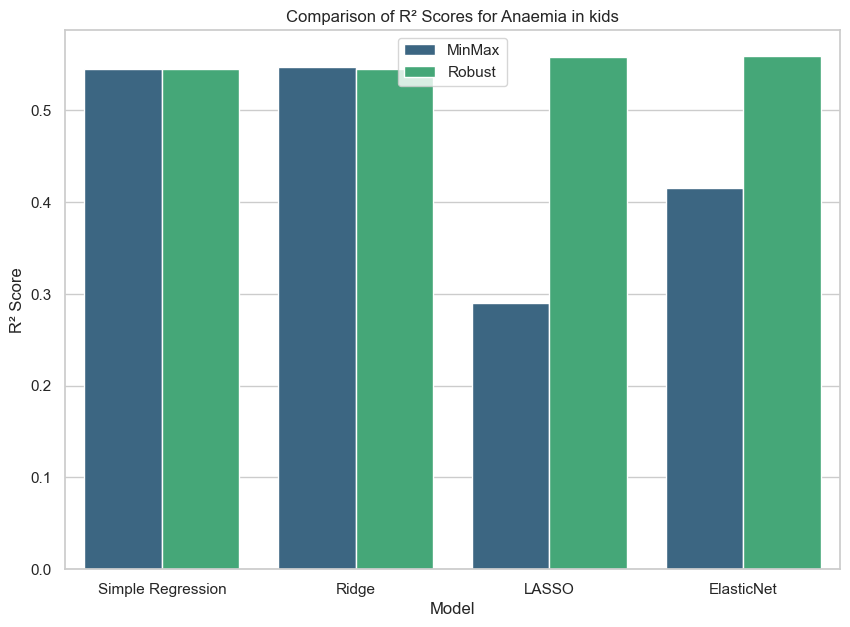

In [69]:
#
model_names = ['Simple Regression', 'Ridge', 'LASSO', 'ElasticNet']

# R² scores for MinMax scaled data
r2_scores_minmax = [0.5447,0.5469,0.2902,0.4150]
# R² scores for Robust scaled data
r2_scores_robust = [0.5447,0.5447,0.5577,0.5594]

# Create a DataFrame for plotting
data = {
    'Model': model_names * 2,
    'R² Score': r2_scores_minmax + r2_scores_robust,
    'Scaling': ['MinMax'] * len(model_names) + ['Robust'] * len(model_names)
}

dt = pd.DataFrame(data)
# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Model', y='R² Score', hue='Scaling', data=dt, palette='viridis')

# Add title and labels
plt.title('Comparison of R² Scores for Anaemia in kids')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.legend(loc='upper center')
# Show the plot
plt.show()



So for our current dataset and hypothesis,

Elastic NET with Robust Scaling works best but not satisfactory yet.

# Insights:

### Insight 1:

About 55% of the variance in Children Anemia percentage can be explained from Mother health, education and living condition factors.

Rest 55% can be explained using conditions of children and other minor factors.


### Insight-2

The weight for clean fuel % is highest among all other factors (~0.45) in child anaemia cases can be explained by the percentage of usage of clean fuel in a household. This suggest that the usage of unclean fuel is highly correlated to child anaemia in poor Indian households.

## Child and Mother Correlation Heatmap:

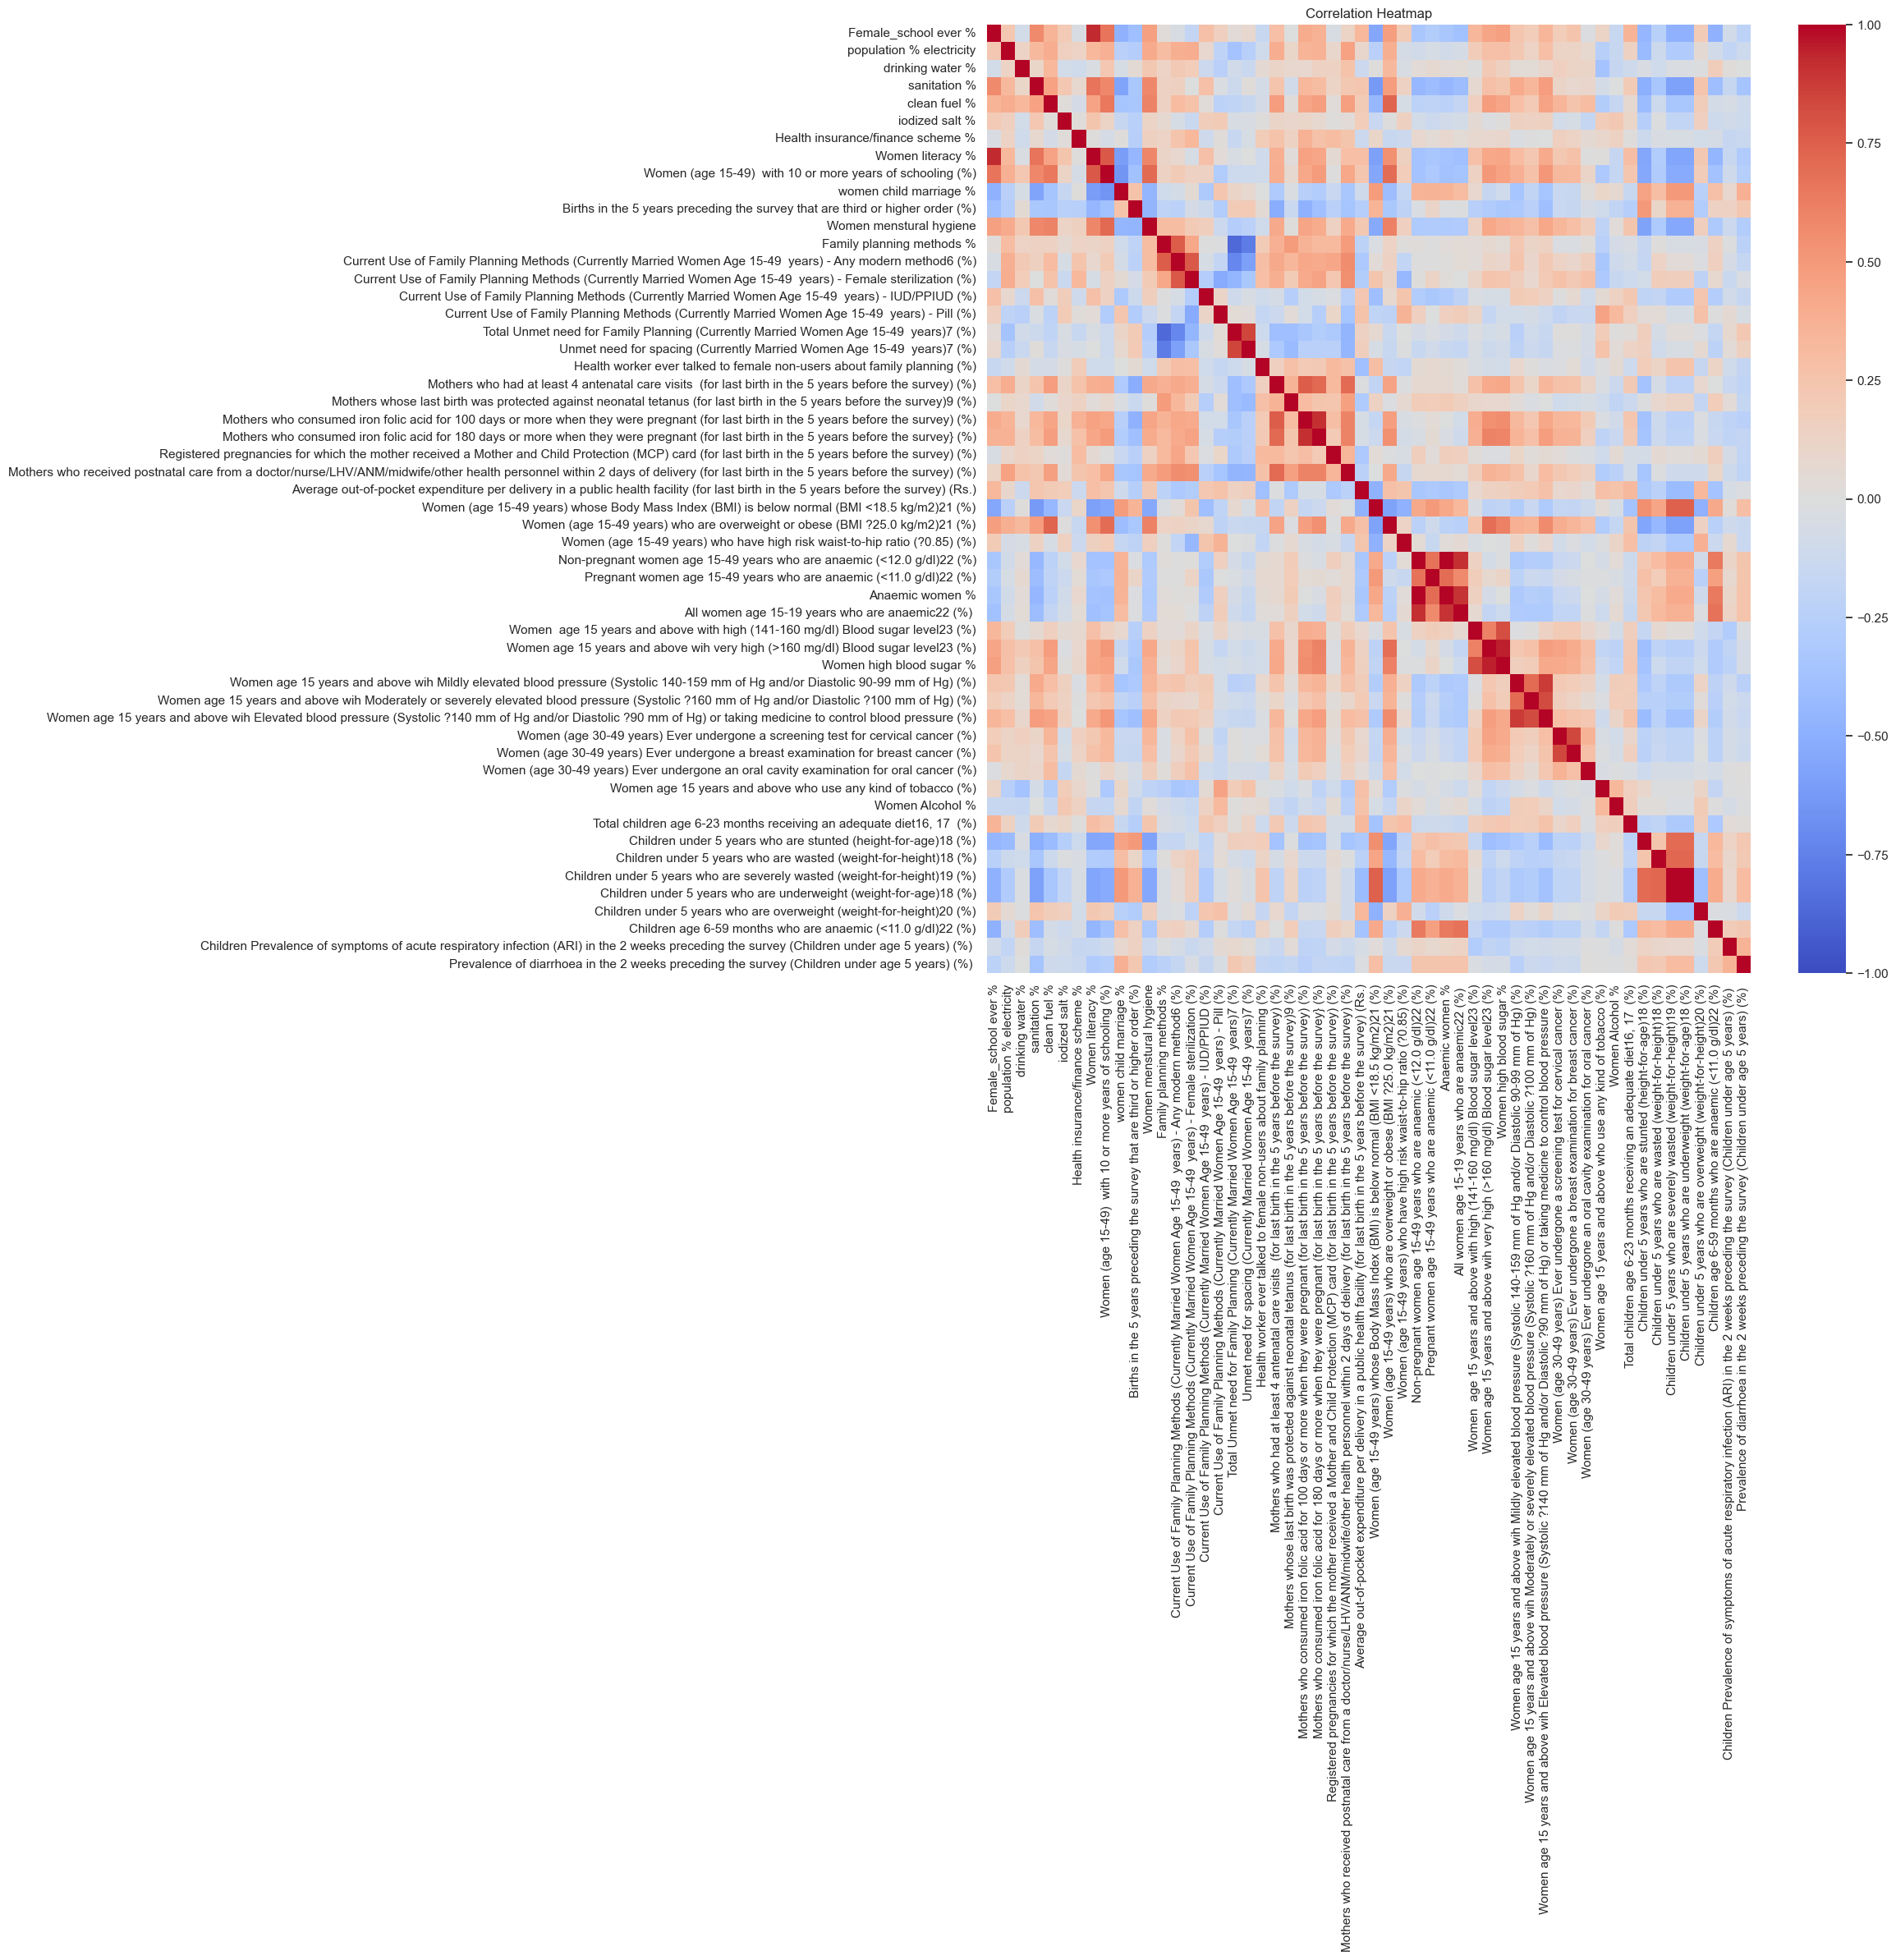

In [70]:
# Concatenate the DataFrames
combined_df = pd.concat([femaledf_imp, childdf_imp], axis=1)

# Compute the correlation matrix
corr_matrix = combined_df.corr()


plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1,xticklabels = True, yticklabels = True)
plt.title('Correlation Heatmap')
plt.show()


